# Assignment 6: Amounts and Proportions

<hr></hr>

## Import the required libraries


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data


In [113]:
tesla_sales = pd.read_csv('tesla sales.csv')

In [4]:
tesla_sales

,quarter,year,total-production,s-x-sales,3-y-sales,total-sales
0,Q1,2017,25418.0,25000.0,NaN,25051.0
1,Q2,2017,25708.0,22000.0,NaN,22026.0
2,Q3,2017,25336.0,25930.0,222.0,26137.0
3,Q4,2017,24565.0,28320.0,1542.0,29967.0
4,Q1,2018,34494.0,21800.0,8182.0,29997.0
5,Q2,2018,53339.0,22300.0,18440.0,40740.0
6,Q3,2018,80142.0,27660.0,56065.0,83725.0
7,Q4,2018,86555.0,27550.0,63359.0,90700.0
8,Q1,2019,77100.0,12100.0,50900.0,63000.0
9,Q2,2019,87048.0,17650.0,77550.0,95200.0


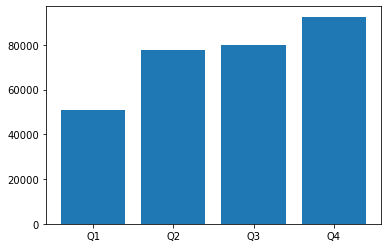

In [7]:
fig, ax = plt.subplots()
ts = tesla_sales[tesla_sales.year == 2019]
ax.bar(ts['quarter'], ts['3-y-sales']);

## Task 1: Improve the bar chart

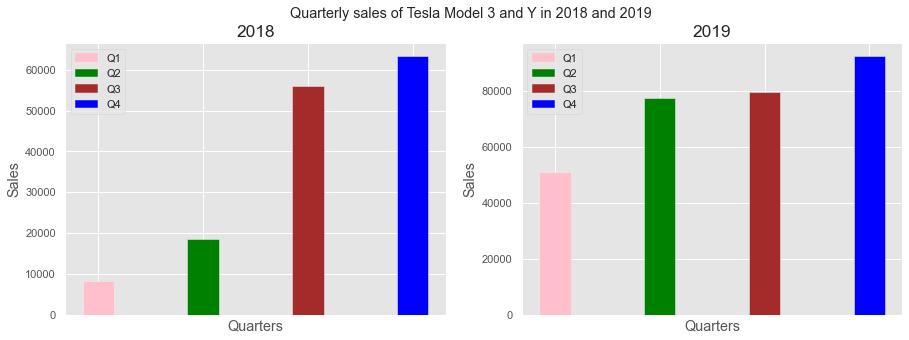

In [147]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(nrows=1,ncols=2)

fig.set_figwidth(15)
fig.set_figheight(5)

colors = {'Q1':'pink', 'Q2':'green','Q3':'brown', 'Q4':'blue'}


ts_2018 = tesla_sales[tesla_sales.year == 2018]

ax[0].set_title("2018")

ax[0].bar(ts_2018['quarter'], ts_2018['3-y-sales'],width=0.3,color=ts_2018['quarter'].apply(lambda x: colors[x]));

ax[0].tick_params(
    axis='x',       
    which='both',     
    bottom=False,     
    top=False,         
    labelbottom=False);


labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax[0].legend(handles, labels)
ax[0].set_xlabel('Quarters')
ax[0].set_ylabel('Sales')



ts_2019 = tesla_sales[tesla_sales.year == 2019]

ax[1].set_title("2019")

ax[1].bar(ts_2019['quarter'], ts_2019['3-y-sales'],width=0.3,color=ts_2019['quarter'].apply(lambda x: colors[x]));

ax[1].tick_params(
    axis='x',       
    which='both',     
    bottom=False,     
    top=False,         
    labelbottom=False);

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax[1].legend(handles, labels)
ax[1].set_xlabel('Quarters')
ax[1].set_ylabel('Sales')

fig.suptitle(t="Quarterly sales of Tesla Model 3 and Y in 2018 and 2019");

## Grouped bar chart

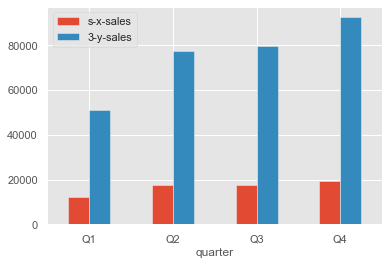

In [141]:
ts = tesla_sales[tesla_sales.year == 2019]
ts.plot(x='quarter', y=['s-x-sales', '3-y-sales'], kind='bar', rot=0);

## Task 2: Enhance the grouped bar chart

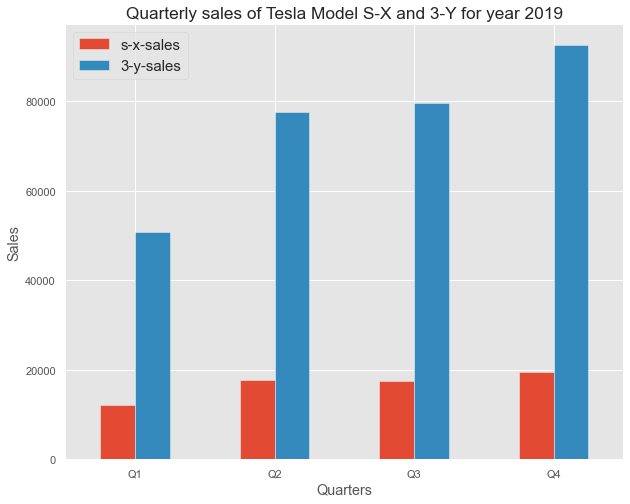

In [146]:
# Update the font size of the plot parameters
plt.rcParams.update({'font.size': 12})

# Select the quaterly sales data of each pair of models for 2019
ts = tesla_sales[tesla_sales.year == 2019]
ts.plot(x='quarter', y=['s-x-sales', '3-y-sales'], kind='bar', rot=0,figsize=(10,8));


# Label the axes
plt.xlabel('Quarters');
plt.ylabel('Sales');

"""
Move the legend to best location with minimum interference with bars, 
and change the size of the characters in the legend box.

"""
plt.title("Quarterly sales of Tesla Model S-X and 3-Y for year 2019");

plt.legend(loc = 'best',prop={'size': 15},fancybox=True);

## Task 3: Create a stacked bar chart. 


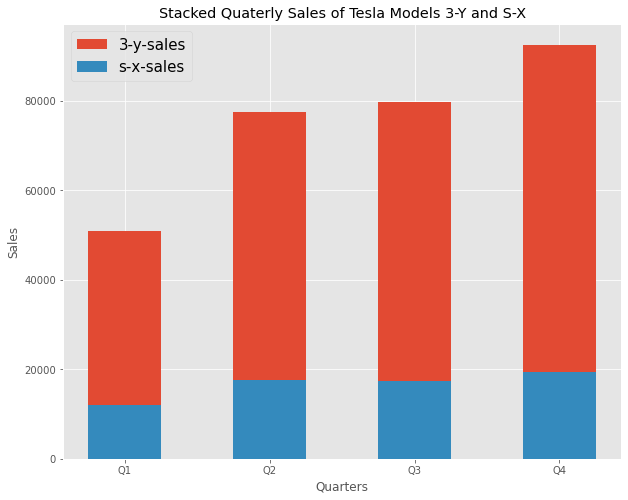

In [111]:
fig,axes=plt.subplots();

plt.rcParams.update({'font.size': 10})
fig.set_size_inches((10,8));

axes.bar(ts['quarter'], ts['3-y-sales'],width = 0.5,label = '3-y-sales')
axes.bar(ts['quarter'], ts['s-x-sales'],width = 0.5,label = 's-x-sales')

axes.set_title('Stacked Quaterly Sales of Tesla Models 3-Y and S-X')
axes.set_xlabel('Quarters')
axes.set_ylabel('Sales');
axes.legend( loc = 'best',prop={'size': 15});


## Seattle weather, 2012-2015 

In [114]:
seattle_weather = data.seattle_weather()
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


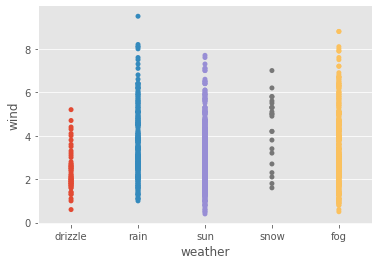

In [115]:
fig, ax = plt.subplots()
sns.stripplot(x='weather', y='wind', data=seattle_weather, jitter=False)
sns.despine()

## Task 4: Improve the strip plot

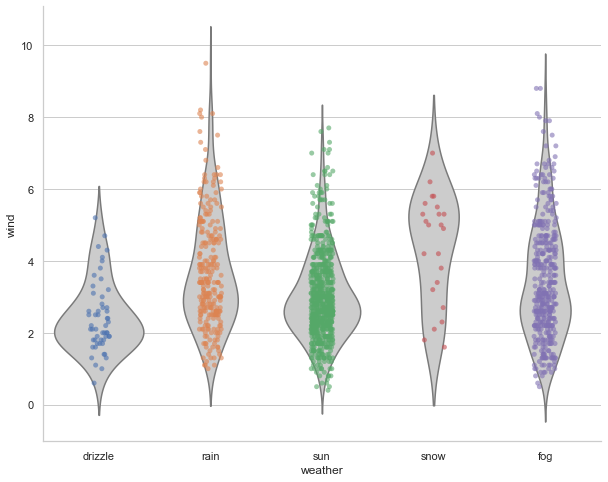

In [129]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches((10,8));

ax = sns.violinplot(x="weather", y="wind", data=seattle_weather,
                    inner=None, color=".8")
sns.stripplot(x='weather', y='wind', data=seattle_weather, jitter=True,alpha=0.6)

sns.despine()

# Heatmap

In [130]:
df_corr = seattle_weather.corr()
print(df_corr)

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


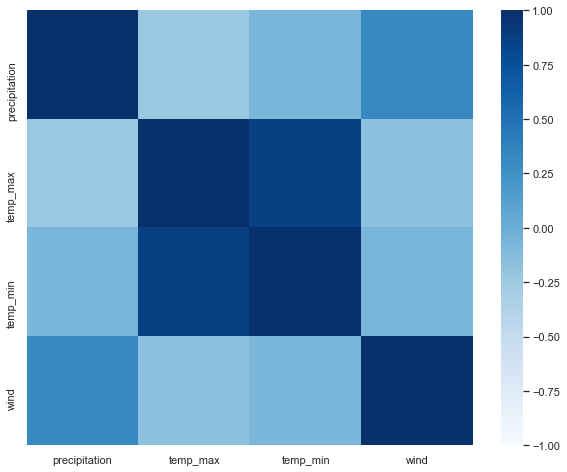

In [131]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=False, cmap='Blues', vmin=-1, vmax=1)
plt.show()

# Task 5: Improve the heatmap

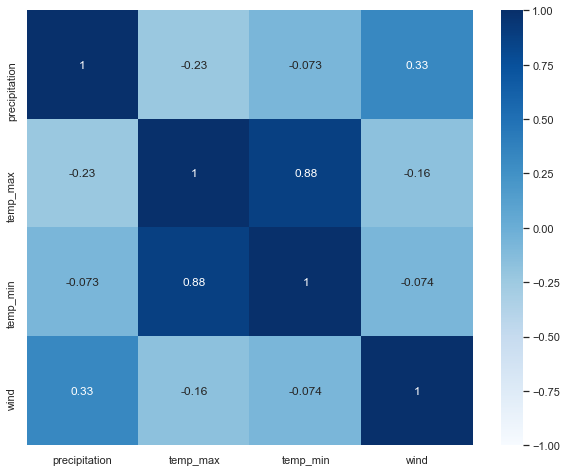

In [132]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

### Color scheme 1 

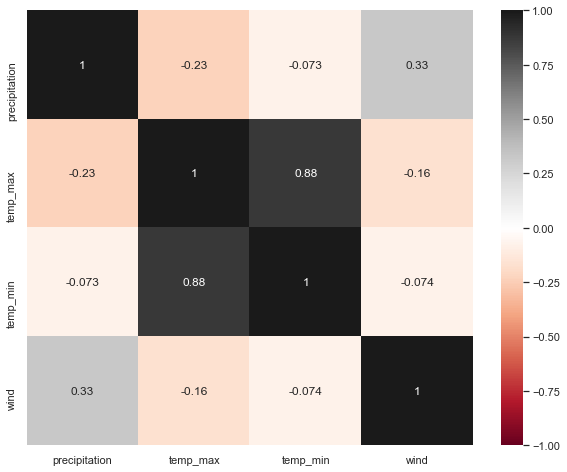

In [137]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='RdGy',vmin=-1, vmax=1)
plt.show()

### Color scheme 2

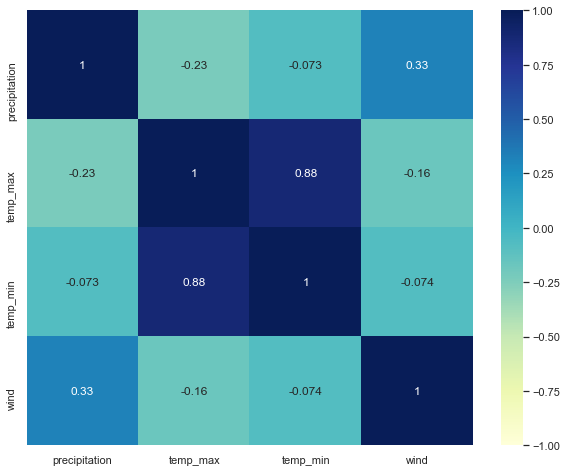

In [135]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

### Color scheme 3

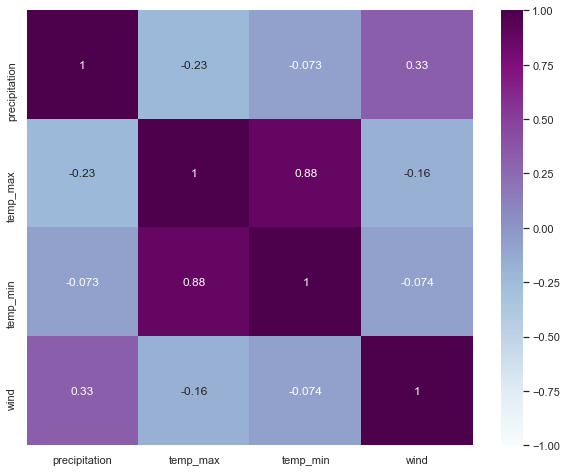

In [138]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.show()

## Task 6: Report
<hr></hr>

<b>Task 1: </b> The initial bar graph which showed the total sales in each quarter of 2019 was simple and was generated with the default parameters of pyplot.bar function. To enhance the graph, I color coded the bar for each quarter, and further I added a legend at the top left corner. The legend shows the color of the bar for each quarter. It's common to compare the quaterly results of two years. So, I created two subplots, one each for years- 2018 and 2019. I then generated the bar plots representing the quaterly sales in years 2018 and 2019. I added a title to the entire plot. I have also added the ggplot theme to make the plot look better. Also, I decreased the width of the plots to 0.3. For futrue improvements, I could annotate each bar with the value and the quarter it represents.

<b>Task 2:</b> We can generate several kinds of plots by using the pandas.DataFrame.plot function- we just have to specify the type of plot we need as an argument to the function. Since the initial plot already had the scripts for generating the grouped bar graph, I just copied the scripts and made some modifications to enhance it. First off, I increased the size of the plot to (10,8). Then, I positioned to the best position where the legend least interacts with the data- in this case, it's the Upper left corner. I also added a title to the plot. For futrue improvements, I could annotate each bar with the value it represents.

<b>Task 3:</b> Pyplot provides an easy interface to create stacked bar graphs. It's as simple as plot two bar graphs on the same axes. So, I plotted two bar graphs one each for quarterly sales of Tesla Models 3-Y and S-X in 2019. To make the plot look better I added a ggplot background, increased the size, and finally added a legend at the "best" possible position with minimal plot interference. I also added an appropriate title which adds context to the plot. For futrue improvements, I could annotate each bar with the value and the quarter it represents.

<b>Task 4:</b> To improve the stripplot, I followed the suggested modifications- enabled jitter, increased the figure size, and modified the alpha parameter to 0.6. Further, I added a whitegrid background to the plot. The strip plot is often a complement to violin or box plots, so I also added a violin plot. The distribution of wind speeds in each climate condition seems more clear to me now.

<b>Task 5: </b> To improve the heatmap, I followed the suggested modifications- added annotations and tried three different color schemes. I liked the RdGy color scheme the most. In this scheme, a correlation coefficient value of 1 is illustarted in black, while value -1 is illustrated by Red. Since the colors are contrasting, it is easier for the viewer to comprehend the correlation between two variables. 